## Exploratory Data Analysis
### Carlos Hinrichsen
### July 3$^{rd}$, 2019

### Real Estate Valuation Data Set 

In our term project we will use the data set of Real Estate, provided in the webpage of the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

### Data Set Information:

1. The house price, `house price of unit area`, is the response variable (Y). The units are ($10000$ New Taiwan Dollar/Ping), where Ping is a local unit, $1$ Ping = $3.3$ meter squared)

On the other hand, we have the following potential predictors:

1. `transaction date`: For example, 2013.250 = 2013 March, 2013.500 = 2013 June, etc.
2. `house age`: Measured in years
3. `distance to the nearest MRT station`: Measured in meters 
4. `number of convenience stores`: The number of convenience stores in the living circle on foot
5. `latitude`: Measured in degrees
6. `longitude`: Measured in degrees

__Below you will find a series of steps in order to understand the data:__

## 1. Import Required Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import seaborn as sns
import numpy as np
import math
import random
import pandas as pd
plt.style.use('ggplot')

## 2. Upload the `Real estate valuation data set.xlsx` data to explore

In [2]:
import pandas as pd
odata = pd.read_excel('Real estate valuation data set.xlsx', header=[0],sheet_name="Data")

## 3. Exploring the raw data set

The names of the different variables is shown below.

In [3]:
# Extract column names
odata.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

Now, we will review the general characteristics of the dataset, and then review the data.

In [4]:
# Extract information of dataset
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Looking for the general description of the data

In [5]:
# Extract description
odata.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Let's see the number of unique values per variable

In [6]:
# Count the number of unique values
odata.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

There are cases where the number of unique variables is very low (`X1 transaction data` and `X4 number of convinience stores`)

Important things to notice:

__1. There are no NAN observations in the dataset__ 

__2. If needed for analysis, we will transform some of the variables into categorical__

__3. The `No` variable is not relevant. It should be removed__

__4. We will change the name of the variables to a distintinctive ones__

__5. We will perform some transformation. Fo example, the `Y house price of unit area` to units more known__

In [7]:
# Showing the data
odata

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


## 4. Data Cleaning and Transformation

As explained above, we will first drop the irrelevant variables: `No`:

In [8]:
# Dropping the columns
odata = odata.drop(['No'], axis=1)

In [9]:
# Remaning the default variable name
odata.rename(columns={'X1 transaction date':'TD','X2 house age':'AGE','X3 distance to the nearest MRT station':'DST','X4 number of convenience stores':'STR','X5 latitude':'LAT','X6 longitude':'LONG','Y house price of unit area':'PRICE'},inplace=True)

In [10]:
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
TD       414 non-null float64
AGE      414 non-null float64
DST      414 non-null float64
STR      414 non-null int64
LAT      414 non-null float64
LONG     414 non-null float64
PRICE    414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.7 KB


Now, we will change the units of `PRICE`. 

Considering that 1 New Taiwan Dollar is around 0.042 CAD (the new unit will be $CAD/mt^2$ )

In [11]:
# Currency rate NTW/CAD
cr = 0.042
# PING/meter squared
mt = 1/3.3
odata['NPRICE'] = odata['PRICE']*cr*mt*1000
# Now we drop the original variable
odata = odata.drop(['PRICE'], axis=1)
odata.head()

,TD,AGE,DST,STR,LAT,LONG,NPRICE
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,482.363636
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,537.090909
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,602.000000
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,697.454545
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,548.545455


Finally, we will change the `TD` and `STR` into categorical variables. We will create a copy of the previous dataset (without categorical variables), in case we need it in further analysis (for example, for correlation purposes).

In [12]:
# Only numerical
odata_n = odata.copy()
# With categorical
odata_c = odata.copy()
# Performing transformations
odata_c['TD'] = pd.Categorical(odata_c.TD)
odata_c['STR'] = pd.Categorical(odata_c.STR)
odata_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
TD        414 non-null category
AGE       414 non-null float64
DST       414 non-null float64
STR       414 non-null category
LAT       414 non-null float64
LONG      414 non-null float64
NPRICE    414 non-null float64
dtypes: category(2), float64(5)
memory usage: 17.9 KB


Now we are reday to analyze the data

## 5. Data Analysis

#### 5.1. Correlation Map with all variables. 


For this, we will use the data with numerical values, `odata_n`

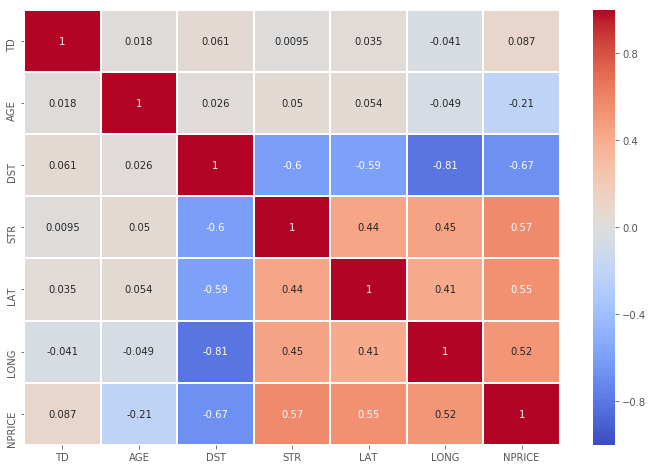

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(odata_n.corr().round(4), annot=True,linewidths=1.0,vmin=-1,vmax=1,cmap="coolwarm")

We can see that the stronger negative relations is between the variable `DST` with variables `STR`, `LAT`, `LONG` and `NPRICE`. That makes sense, closer you are to a MTR station, higher the price for the house. That is why the correlation map shows a negative correlation coeficient of $-0.67$ between the variables `DST` with `NPRICE`.

The same happens with `LAT`, `LONG` and `STR`. This means:

* Higher the distance to a MTR station, you house should be moving to the west (`LONG`)
* Higher the distance to a MTR station, you house should be moving to the south (`LAT`)
* Higher the distance to a MTR station, the number of stores should be reduced (`STR`)

Now we can see that the stronger positive relations is with the variable `NPRICE` with variables `STR`, `LAT` and `LONG`. All of them make sense:

* Higher the number of stores nearby, higher the price of the house
* If you move to the north, the price of the house should be higher
* If you move to the east, the price of the house should be higher


#### 5.2. Relation between variables using Pairs.

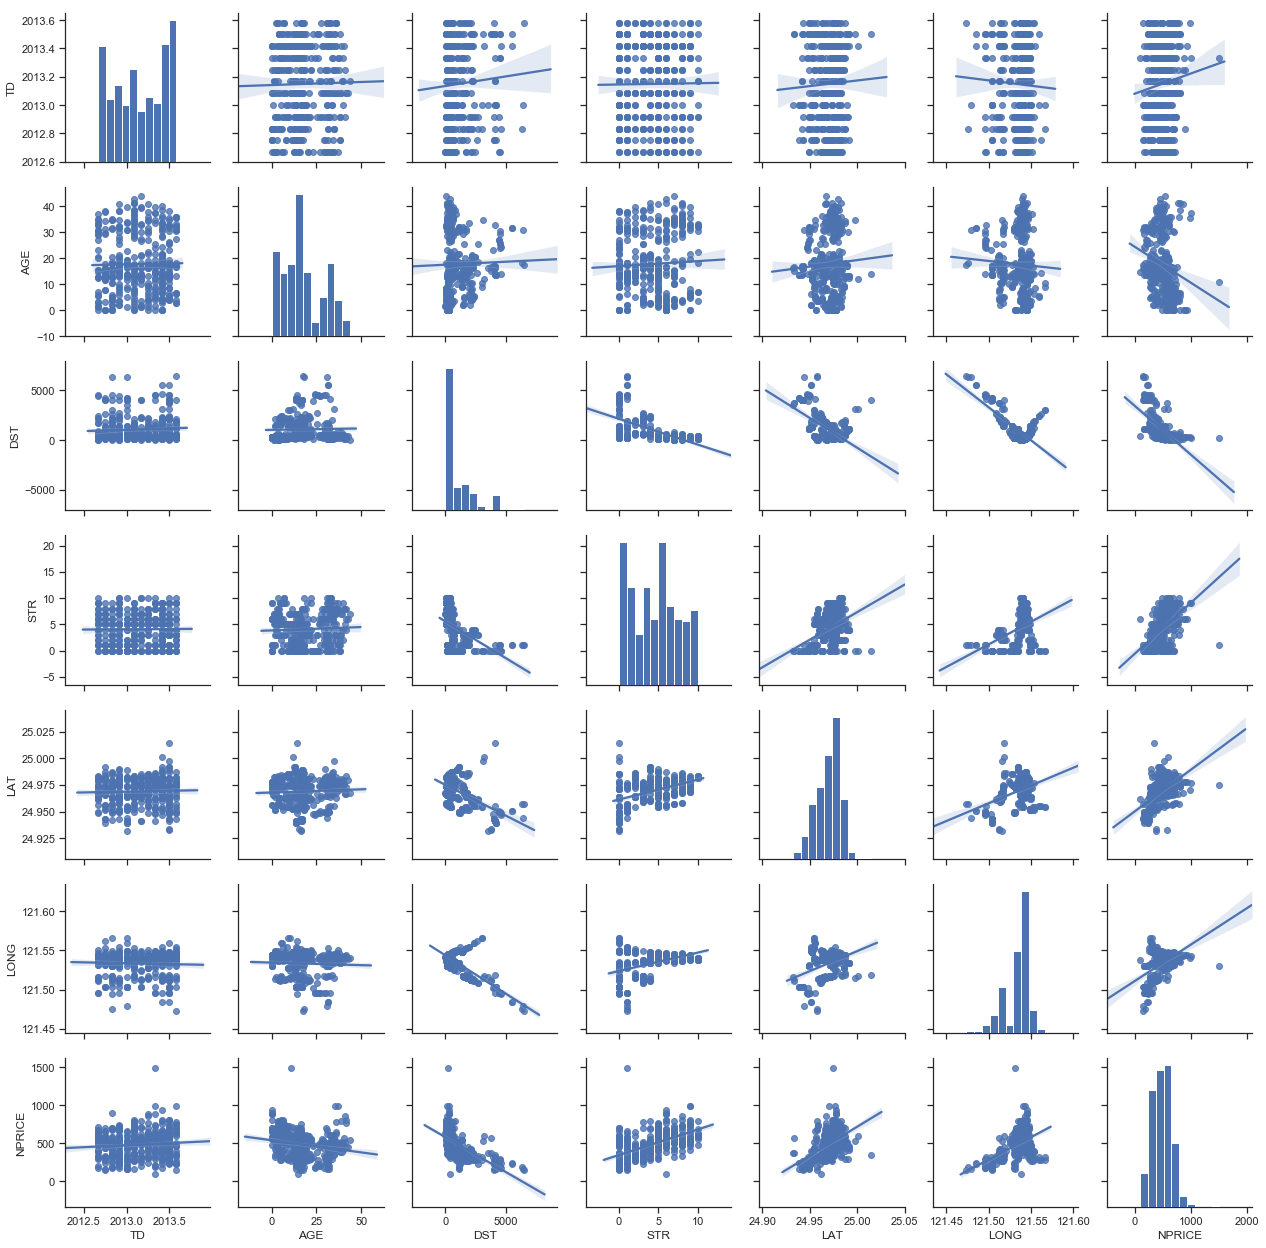

In [14]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(odata_n,kind="reg")

The graph shows more precisely the relations that we saw in the heatmap, with linear relations included.

#### 5.3. Relation between `TD` and `NPRICE`. 

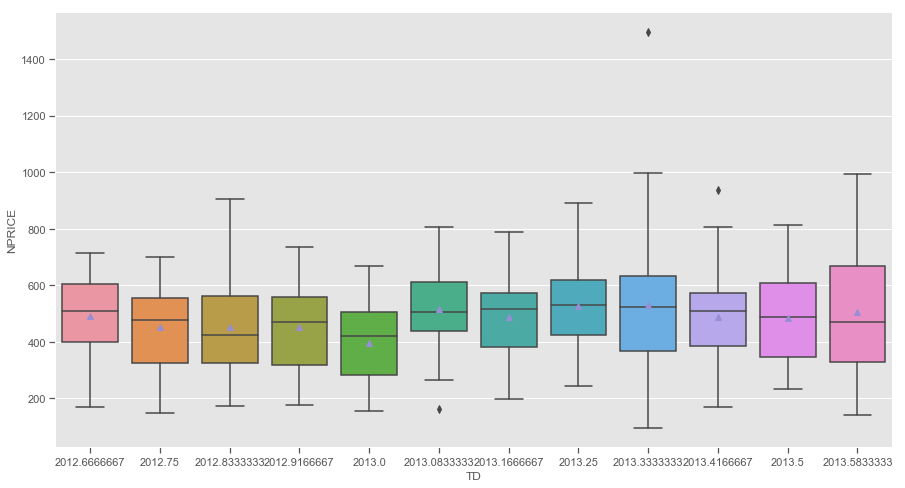

In [15]:
plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 8))
sns.boxplot(x="TD", y="NPRICE",data=odata_c,showmeans=True)

It's difficult to see a relation between each month, but we can see that somewhat the price could differ. In the plot we can see triangles in each plot, which are the expected value of the price by each `TD`. We can see that the prices in 2013 seem to be higher than 2012 (without considering the `2013.0`).

Let´s plot the mean of each transaction month.

Text(0, 0.5, 'Mean')

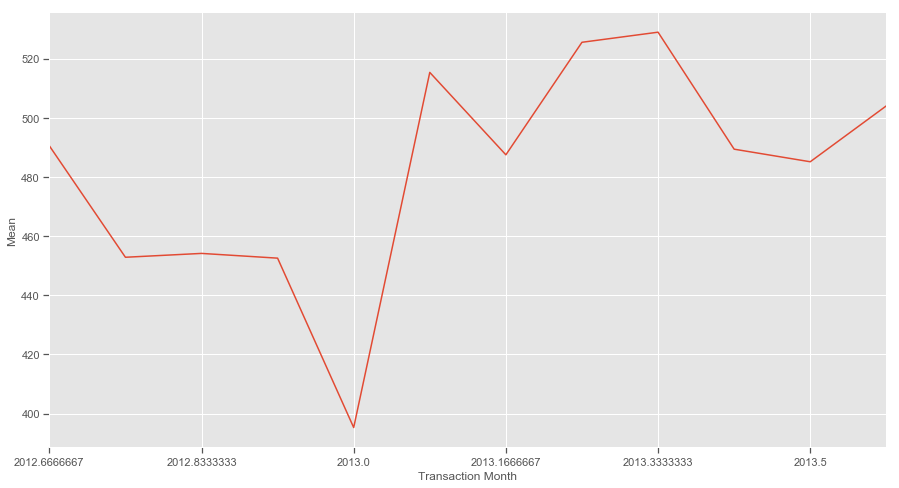

In [16]:
pmean = odata_c.groupby(['TD'])['NPRICE'].mean().plot()
pmean.set_xlabel("Transaction Month")
pmean.set_ylabel("Mean")

Here we can see the effect explained above

Therefore, we will group all 2012 `TD` into just one label `2012` and all 2013 `TD` into `2013` label.

In order to do that, we need:
1. Transform the `TD` variable to string
2. Extract the year of the string and define a new variable, `TD_Y`
3. Transform `TD_Y` to int and `TD` to float

Like our previous analysis, we will create to datasets, one with the numerical variables and another one with some categorical.

In [17]:
# Change transaction to string
odata_n['TD'] = odata_n['TD'].astype(str)
# Extract year and saved in other variable
odata_n['TD_Y'] = odata_n['TD'].str.extract("(.*)\.")
# Change the original and new variable to int
odata_n['TD'] = odata_n['TD'].astype(float)
odata_n['TD_Y'] = odata_n['TD_Y'].astype(int)
# Let's see the info of the new dataset
odata_n.head()

,TD,AGE,DST,STR,LAT,LONG,NPRICE,TD_Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,482.363636,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,537.090909,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,602.000000,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,697.454545,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,548.545455,2012


Now let's create the new categorical dataset with this new variable, `TD_Y` 

In [18]:
odata_c = odata_n.copy()
odata_c['TD'] = pd.Categorical(odata_c.TD)
odata_c['TD_Y'] = pd.Categorical(odata_c.TD_Y)
odata_c['STR'] = pd.Categorical(odata_c.STR)

In [19]:
odata_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
TD        414 non-null category
AGE       414 non-null float64
DST       414 non-null float64
STR       414 non-null category
LAT       414 non-null float64
LONG      414 non-null float64
NPRICE    414 non-null float64
TD_Y      414 non-null category
dtypes: category(3), float64(5)
memory usage: 18.4 KB


Now let's do the same plot that relates transaction with price, but considering the new variable `TD_Y`

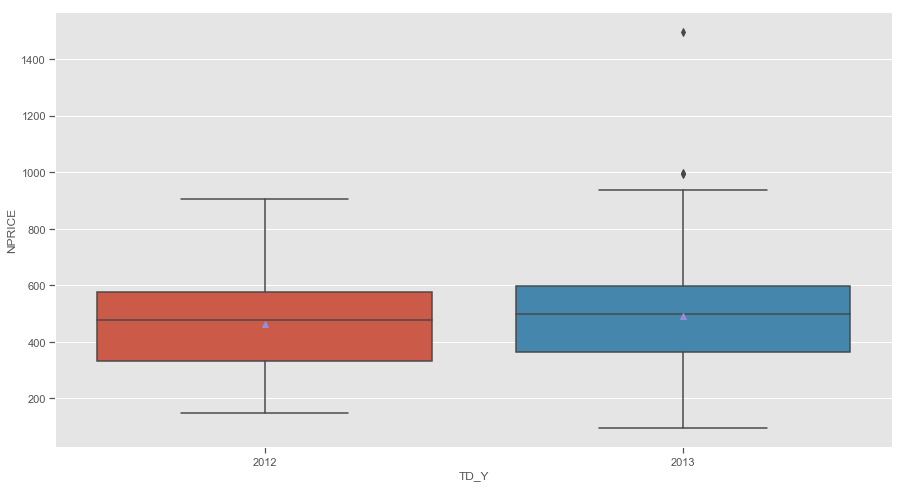

In [20]:
plt.rc('figure', figsize=(15, 8))
sns.boxplot(x="TD_Y", y="NPRICE",data=odata_c,showmeans=True)

The mean is slightly higher in 2013, so it's not clear that exists a meaningful difference between the means.

Let's perform the correlation between `NPRICE` and `TD_Y`

In [21]:
odata_n['NPRICE'].corr(odata_n['TD_Y'])

0.08154451854825454

It's still non relevant.

#### 5.4. Spatial Relation.

The main idea is to understand how could change different variables (as `NPRICE` in different locations represented by `LAT` and `LONG`). In order to visualize these relations, we will transform some variables into categories. 

In [22]:
# First let's copy our data
odata_c2= odata_c.copy()

Now we will create different categories for the variables `AGE`, `DST` and `NPRICE`. This will help us to visualize the data and to perform other analysis using tables.  

In [23]:
# Creating the categories
# For Age. We will assume that over 30 years it's old enough
age_cat=pd.cut(odata_c2.AGE,[0, 5, 10,15,20,25,30,50], include_lowest=True)
# For Distance. We will assume that over 2000 mt it's too long 
dst_cat=pd.cut(odata_c2.DST,[0, 500, 1000,1500,2000,7000], include_lowest=True)
# For Price. We will assume that over 1500 it's too expensive
nprice_cat=pd.cut(odata_c2.NPRICE,[0, 200, 400,600,800,1500], include_lowest=True)
odata_c2['AGE_C'] = age_cat
odata_c2['DST_C'] = dst_cat
odata_c2['NPRICE_C'] = nprice_cat
odata_c2['AGE_C'] = pd.Categorical(odata_c2.AGE_C)
odata_c2['DST_C'] = pd.Categorical(odata_c2.DST_C)
odata_c2['NPRICE_C'] = pd.Categorical(odata_c2.NPRICE_C)
# Dropping original variables
odata_c2 = odata_c2.drop(['AGE','DST','NPRICE'], axis=1)
odata_c2.head()

,TD,STR,LAT,LONG,TD_Y,AGE_C,DST_C,NPRICE_C
0,2012.916667,10,24.98298,121.54024,2012,"(30.0, 50.0]","(-0.001, 500.0]","(400.0, 600.0]"
1,2012.916667,9,24.98034,121.53951,2012,"(15.0, 20.0]","(-0.001, 500.0]","(400.0, 600.0]"
2,2013.583333,5,24.98746,121.54391,2013,"(10.0, 15.0]","(500.0, 1000.0]","(600.0, 800.0]"
3,2013.500000,5,24.98746,121.54391,2013,"(10.0, 15.0]","(500.0, 1000.0]","(600.0, 800.0]"
4,2012.833333,5,24.97937,121.54245,2012,"(-0.001, 5.0]","(-0.001, 500.0]","(400.0, 600.0]"


##### Relation between Longitude and Latitude with rest of Variables

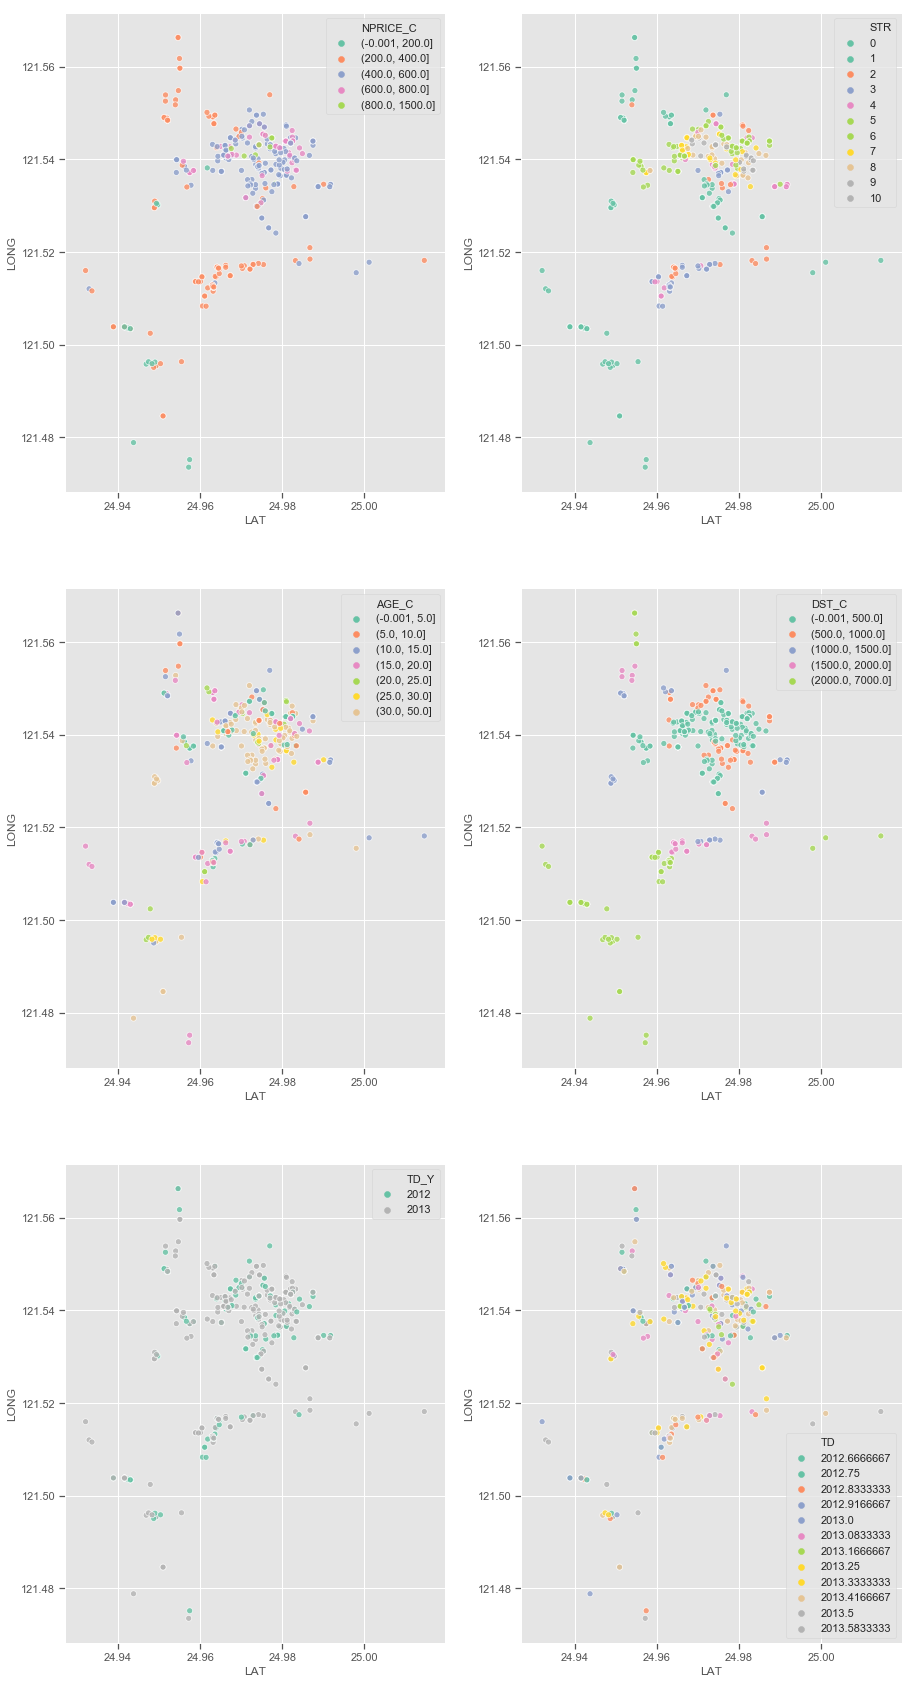

In [24]:
plt.rc('figure', figsize=(15, 30))
plt.subplot(3,2,1)
sns.scatterplot(x="LAT", y="LONG",hue="NPRICE_C", palette="Set2",legend="full", alpha=0.8,data=odata_c2)
plt.subplot(3,2,2)
sns.scatterplot(x="LAT", y="LONG",hue="STR", palette="Set2",legend="full", alpha=0.8,data=odata_c2)
plt.subplot(3,2,3)
sns.scatterplot(x="LAT", y="LONG",hue="AGE_C",palette="Set2",legend="full", alpha=0.8,data=odata_c2)
plt.subplot(3,2,4)
sns.scatterplot(x="LAT", y="LONG",hue="DST_C",palette="Set2",legend="full", alpha=0.8,data=odata_c2)
plt.subplot(3,2,5)
sns.scatterplot(x="LAT", y="LONG",hue="TD_Y",palette="Set2",legend="full", alpha=0.8,data=odata_c2)
plt.subplot(3,2,6)
sns.scatterplot(x="LAT", y="LONG",hue="TD",palette="Set2",legend="full", alpha=0.8,data=odata_c2)

Looking the plots we can highlight the following:

1. __Plot #1 (`NPRICE_C`)__
    * In the peripheral zones, the house prices are the lowest. This could mean that in this part of Taiwan the plot shows a city surrounded by agricultural lands
    * The zone with more observations (the central part of the city), the house prices tend to increment 
2. __Plot #2 (`STR`)__
    * As same as previous plot, the peripheral zones have less number of stores nearby than central areas
3. __Plot #3 (`AGE_C`)__
    * New houses are located close to the north of the center of the city
    * Older houses are located in the center of the city
    * Houses in between are usually distributed in other parts of the map
4. __Plot #4 (`DST_C`)__
    * As the first two plots, the peripheral zones have longer distances to MTR stations than central located houses
5. __Plots #5 and #6 (`TD` and `TD_Y`)__
    * It seems that he dates of the transactions (months or years) are not related with the location of the houses
   

##### Relation between `NPRICE` and rest of categorical Variables

Let's see the number of observations of the different categories of prices

In [25]:
odata_c2.groupby(['NPRICE_C']).size()

NPRICE_C
(-0.001, 200.0]     19
(200.0, 400.0]     122
(400.0, 600.0]     177
(600.0, 800.0]      83
(800.0, 1500.0]     13
dtype: int64

And the probabilities

In [26]:
odata_c2.groupby(['NPRICE_C']).size()/len(odata_c2.NPRICE_C)*100

NPRICE_C
(-0.001, 200.0]     4.589372
(200.0, 400.0]     29.468599
(400.0, 600.0]     42.753623
(600.0, 800.0]     20.048309
(800.0, 1500.0]     3.140097
dtype: float64

Most of the houses are on the third group

##### Relation between 'NPRICE_C' and 'TD_Y'

In [27]:
odata_c2.groupby(['NPRICE_C','TD_Y']).size().unstack(fill_value=0)

TD_Y,2012,2013
NPRICE_C,,
"(-0.001, 200.0]",8,11
"(200.0, 400.0]",38,84
"(400.0, 600.0]",55,122
"(600.0, 800.0]",24,59
"(800.0, 1500.0]",1,12


We can see that most of the transactions were made in 2013

##### Relation between 'NPRICE_C' and 'STR'

In [28]:
odata_c2.groupby(['NPRICE_C','STR']).size().unstack(fill_value=0)

STR,0,1,2,3,4,5,6,7,8,9,10
NPRICE_C,,,,,,,,,,,
"(-0.001, 200.0]",14,4,0,0,0,0,1,0,0,0,0
"(200.0, 400.0]",34,25,15,32,7,5,1,2,1,0,0
"(400.0, 600.0]",15,14,8,12,21,35,19,18,20,10,5
"(600.0, 800.0]",4,2,1,2,2,27,10,11,7,12,5
"(800.0, 1500.0]",0,1,0,0,1,0,6,0,2,3,0


We can see a trend where higher the number of stores nearby, higher the price of the house. This trend is clear until you reach the most expensive houses.

##### Relation between 'NPRICE_C' and 'AGE_C'

In [29]:
odata_c2.groupby(['NPRICE_C','AGE_C']).size().unstack(fill_value=0)

AGE_C            (-0.001, 5.0]  (5.0, 10.0]  (10.0, 15.0]  (15.0, 20.0]  \
NPRICE_C                                                                  
(-0.001, 200.0]              0            0             4             6   
(200.0, 400.0]               9            9            33            36   
(400.0, 600.0]              22           11            34            32   
(600.0, 800.0]              28           24            10            11   
(800.0, 1500.0]              5            2             1             0   

AGE_C            (20.0, 25.0]  (25.0, 30.0]  (30.0, 50.0]  
NPRICE_C                                                   
(-0.001, 200.0]             2             3             4  
(200.0, 400.0]              9             7            19  
(400.0, 600.0]              9            13            56  
(600.0, 800.0]              0             0            10  
(800.0, 1500.0]             0             0             5  

We can see that the newer houses hae higher prices, meanwhile older houses tend to have middle range prices. There are relevant number of middle range age houses that are less expensive than older ones.

##### Relation between 'NPRICE_C' and 'DST_C'

In [30]:
odata_c2.groupby(['NPRICE_C','DST_C']).size().unstack(fill_value=0)

DST_C            (-0.001, 500.0]  (500.0, 1000.0]  (1000.0, 1500.0]  \
NPRICE_C                                                              
(-0.001, 200.0]                1                0                 3   
(200.0, 400.0]                 9                9                28   
(400.0, 600.0]               115               47                 7   
(600.0, 800.0]                74                8                 1   
(800.0, 1500.0]               12                1                 0   

DST_C            (1500.0, 2000.0]  (2000.0, 7000.0]  
NPRICE_C                                             
(-0.001, 200.0]                 0                15  
(200.0, 400.0]                 25                51  
(400.0, 600.0]                  1                 7  
(600.0, 800.0]                  0                 0  
(800.0, 1500.0]                 0                 0  

It's clear the trend that houses closer to MTR stations have higher prices, and the ones located further away have lower prices.

## 6. Clustering --> To discuss

The purpose of this section is to understand how many neighborhoods exist in that cuty of Taiwan (if any). We will perform  K-Means and Hierarchical Clustering algorithms. 

#### 6.1. K-Means 

#### 6.2. Hierarchical Clustering 